In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *


In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .12
x0 = 0
y0 = 0
z0 = -15
nx = 168
ny = 84
nz = 84
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz*sz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

# domain = np.ones([ny,nx],dtype=bool)
# domain[: 5]= 0
# plt.imshow(domain)

In [3]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
# dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
# dic_f_D2 = {"f_method":"homogenous"}
# D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
#           dic_facies=dic_f_D2)
# dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
# dic_f_D1 = {"f_method":"homogenous"}
# D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
#             ,dic_facies=dic_f_D1)


# PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"homogenous"}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-6.5}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-11}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [4]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1])
# D1.add_facies([facies_1])
# D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Clay added to unit C
Facies Silt added to unit C


In [5]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [6]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [7]:
T1.compute_surf(1)
T1.compute_facies(1)
T1.compute_prop(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.040139198303222656 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.039891958236694336 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.05145692825317383 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.12575316429138184 s
##########################


### 0.27619385719299316: Total time elapsed for computing surfaces ###

### Unit D: facies simulation with homogenous method ####
### Unit D - realization 0 ###
Time elapsed 0.01 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Only one facie

In [8]:
pv.set_jupyter_backend("static")

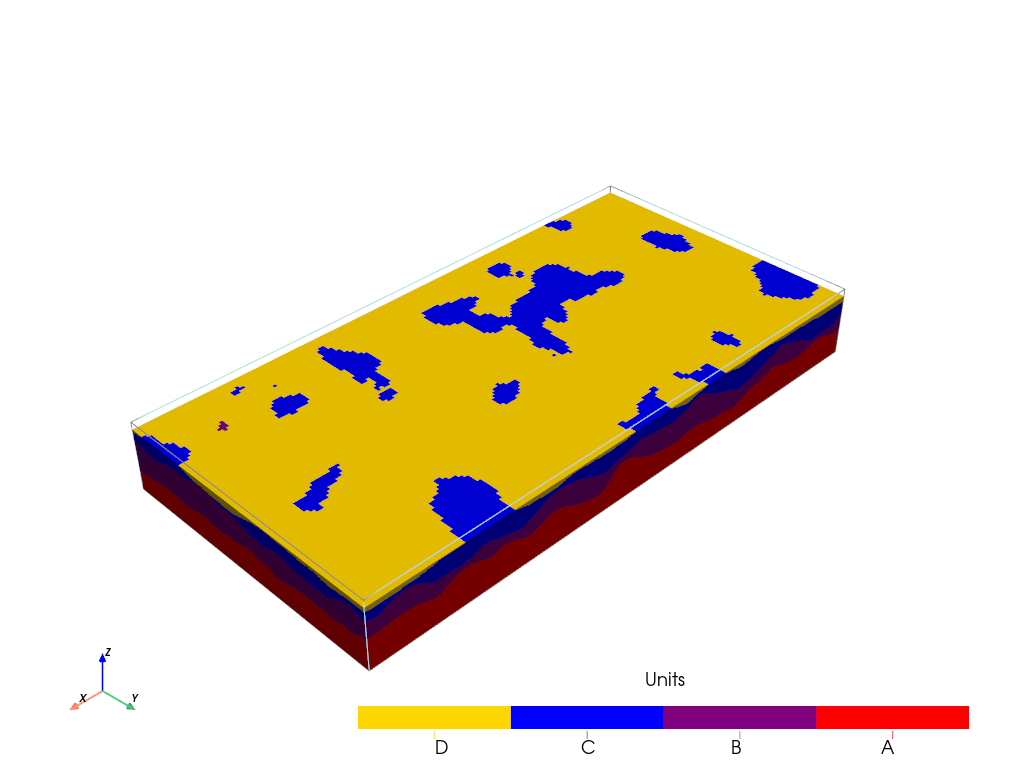

In [9]:
T1.plot_units(v_ex=3)

In [10]:
# T1.plot_facies(v_ex=3)

In [11]:
# T1.plot_prop("K", v_ex=3)

In [12]:
# val = T1.get_prop("K")[0, 0, 0]
# im = geone.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=x0, oy=y0, oz=z0, nv=1, val=val)

In [13]:
import flopy as fp
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

how to compare pathlines using different grid mode ?

- compute distance between the two pathlines (optimal transport, frechet distance)
- difference between time and distance traveled
- compare facies encountered (but how ?)
- compare units encountered

## Comparisons

In [14]:
np.random.seed(1)
# compare pathlines between the 3 modes

n_loc = 30
particles_loc_x = np.random.uniform(100, T1.get_xg()[-1], n_loc)
particles_loc_y = np.random.uniform(0, T1.get_yg()[-1], n_loc)
particles_loc_z = np.random.uniform(-12, -6, n_loc)
particles_loc = list(zip(particles_loc_x, particles_loc_y, particles_loc_z))
# particles_loc.append((170.7, 99.75, -9))
# n_loc += 1

In [15]:
def add_chd(archpy_flow, h1=100, h2=0):

    # add BC at left and right on all layers
    chd_data = []

    gwf = archpy_flow.get_gwf()
    
    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, 0] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h1))

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, -1] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h2))

    chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

In [16]:
iu = 0
ifa = 0
ip = 0
modflow_path = "../../../../../exe/mf6.exe"

grid_modes = ["archpy", "layers", "new_resolution", "new_resolution"]
factor_x = [None, None, 2, 4]
factor_y = [None, None, 2, 4]
factor_z = [None, None, 2, 4]

l_df_pi = []
o = 0
for o in range(len(grid_modes)):
    grid_mode = grid_modes[o]
    print(f"grid_mode: {grid_mode}")
    archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
    archpy_flow.create_sim(grid_mode=grid_mode, iu=iu, factor_x=factor_x[o], factor_y=factor_y[o], factor_z=factor_z[o])
    archpy_flow.set_k("K", iu, ifa, ip, log=True)

    sim = archpy_flow.get_sim()

    add_chd(archpy_flow, 100, 0)  # create some boundary conditions (fixed head on the left and right)

    sim.write_simulation()

    # ims
    if grid_mode == "archpy":
        sim.ims.complexity = "complex"
    else:
        sim.ims.complexity = "moderate"
    sim.ims.write()
    sim.run_simulation()

    # Particle Tracker mode #
    archpy_flow.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
    archpy_flow.prt_run()

    l = []
    for i in range(n_loc):
        l.append(archpy_flow.prt_get_facies_path_particle(i+1))
    
    # store results
    l_df_pi.append(l)

grid_mode: archpy
Simulation created
To retrieve the simulation, use the get_sim() method
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 12600 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been a

In [17]:
def plot_particle_facies_sequence(arch_table, df, plot_time=False, plot_distance=False, proportions=False):

    if plot_time and plot_distance:
        fig, ax = plt.subplots(2,1, figsize=(10, 1.5), dpi=200)
        axi = ax[0]
    elif plot_time or plot_distance:
        fig, axi = plt.subplots(1,1, figsize=(10, 0.5), dpi=200)
    plt.subplots_adjust(hspace=1.5)

    if proportions:
        colors_fa = []
        for col in df.columns:
            if col.split("_")[0] == "facies":
                id_fa = int(col.split("_")[-1])
                color_fa = archpy_flow.T1.get_facies_obj(ID=id_fa, type="ID").c
                colors_fa.append(color_fa)

    if plot_time:

        if proportions:
            df.set_index("time").iloc[:, -len(colors_fa):].plot(color=colors_fa, legend=False, ax=axi)
            axi.set_ylabel("Proportion")
            axi.set_xlabel("time [days]")
            axi.set_ylim(-.1, 1.1)

        else:
            dt = df["dt"]
            for i, (facies, time) in enumerate(zip(df["facies"], df["time"])):
                if i > 0:
                    axi.barh(0, dt[i], left=df["time"].loc[i-1], color=arch_table.get_facies_obj(ID=facies, type="ID").c)
                else:
                    axi.barh(0, dt[i], left=0, color=arch_table.get_facies_obj(ID=facies, type="ID").c, label=arch_table.get_facies_obj(ID=facies, type="ID").name)
            
            axi.set_xlim(0, df["time"].iloc[-1])
            axi.set_xlabel("Time (days)")
            axi.set_yticks([])

        if plot_distance:
            axi = ax[1]
    
    # plot facies function of the distance traveled
    if plot_distance:
        all_dist = df["distance"].values
        all_cum_dist = df["cum_distance"].values

        if proportions:
            df.set_index("cum_distance").iloc[:, -len(colors_fa):].plot(color=colors_fa, legend=False, ax=axi)
            axi.set_ylabel("Proportion")
            axi.set_xlabel("Distance [m]")
            axi.set_ylim(-.1, 1.1)

        else:

            for i in range(int(len(df["facies"]) - 1)):
                facies = df["facies"].iloc[i]
                width = all_dist[i+1]
                distance = all_cum_dist[i]
                axi.barh(0, width, left=distance, color=arch_table.get_facies_obj(ID=facies, type="ID").c)

        axi.set_xlim(0, all_cum_dist[-1])
        axi.set_xlabel("Distance (m)")
        axi.set_yticks([])

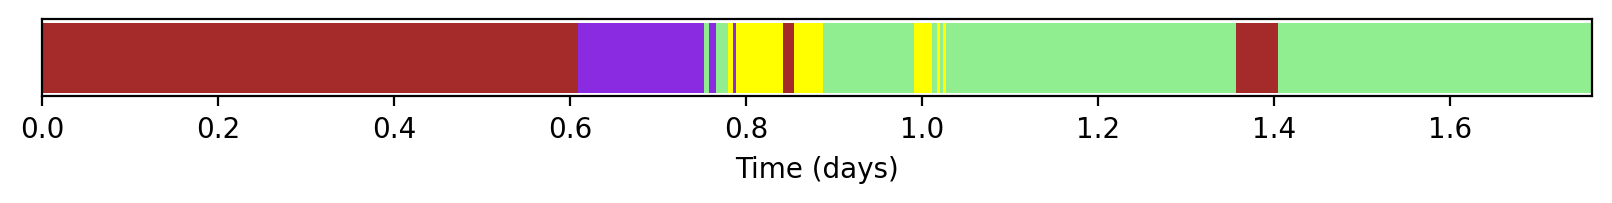

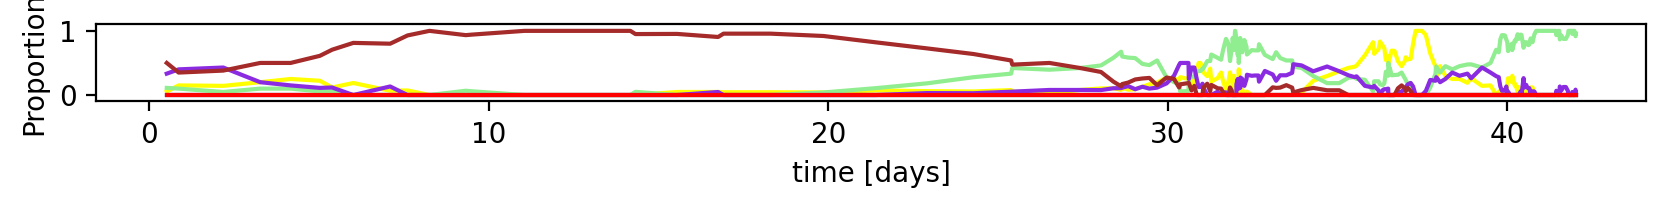

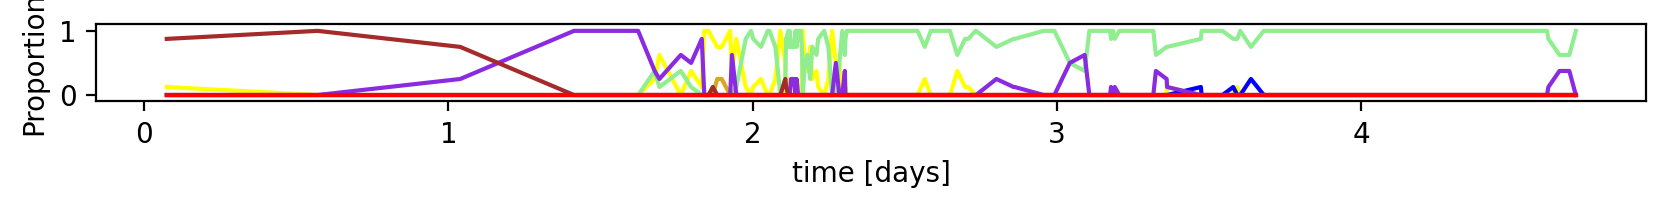

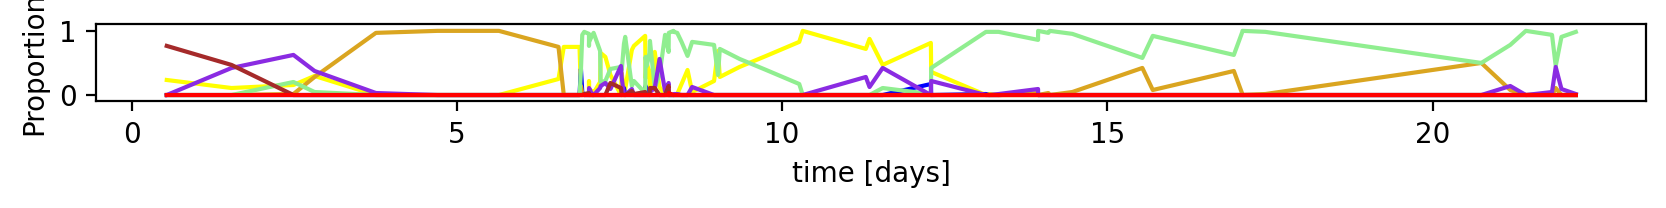

In [18]:
# from ArchPy.ap_mf import plot_particle_facies_sequence

i_mode = 0
i_particle = 1
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False)
i_mode=1
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)
i_mode=2
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)
i_mode=3
plot_particle_facies_sequence(archpy_flow.T1, l_df_pi[i_mode][i_particle], plot_time=True, plot_distance=False, proportions=True)


In [19]:
def get_facies_prop_time(df):
    o = 0
    for col in df.columns:
        if col.split("_")[0] == "facies":
            break
        o += 1

    return ((df.iloc[:, -o:].T * df["dt"].values).T).sum(axis=0) / df["dt"].sum()


all_particles_prop = {}

for i_particle in range(n_loc):
        
    df1 = l_df_pi[0][i_particle]
    facies_prop = {}
    for ifacies in [i.ID for i in archpy_flow.T1.get_all_facies()]:
        df1.loc[df1.facies == ifacies] 
        facies_prop["facies_prop_" + str(ifacies)] = df1.loc[df1.facies == ifacies, "dt"].sum() / df1["dt"].sum()

    df1_prop = pd.Series(facies_prop)
    df2_prop = get_facies_prop_time(l_df_pi[1][i_particle])
    df3_prop = get_facies_prop_time(l_df_pi[2][i_particle])
    df4_prop = get_facies_prop_time(l_df_pi[3][i_particle])

    df_prop = pd.concat([df1_prop, df2_prop, df3_prop, df4_prop], axis=1)
    df_prop.columns = ["archpy", "layers", "new_resolution factor 2", "new_resolution factor 4"]
    df_res = np.sum(np.abs(df_prop.iloc[:, 1:].T - df_prop.archpy), axis=1)
    all_particles_prop[i_particle] = df_res
# df_prop.plot(kind="bar")
# df_prop.T.plot(kind="bar", stacked=True, color=[archpy_flow.T1.get_facies_obj(ID=int(i), type="ID").c for i in [string.split("_")[-1] for string in df_prop.T.columns]], legend=False)

layers                     0.705246
new_resolution factor 2    0.659130
new_resolution factor 4    0.713659
dtype: float64

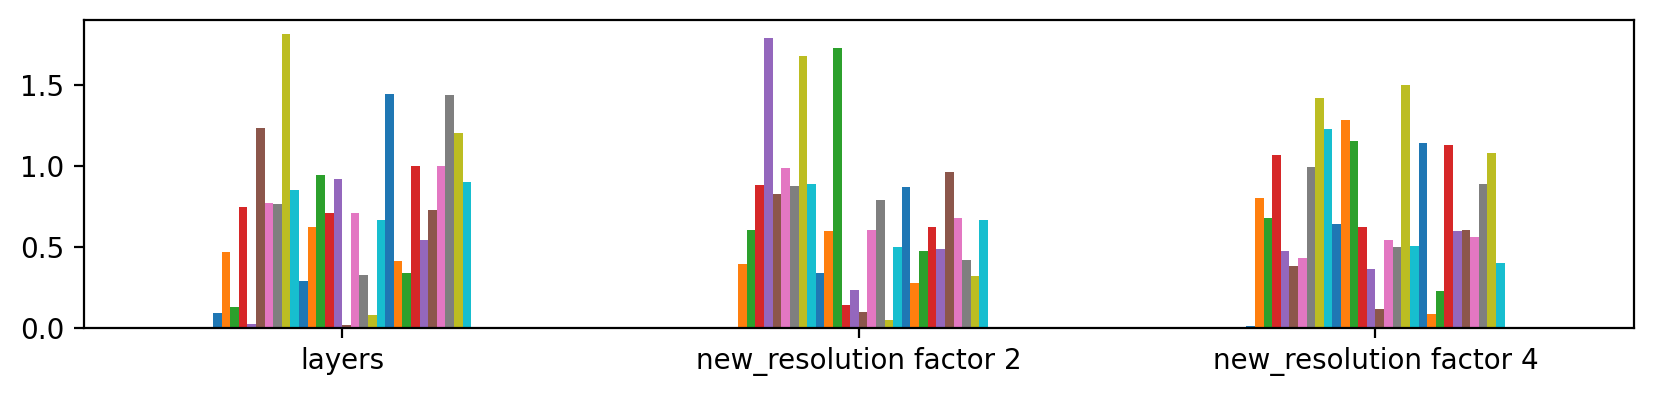

In [20]:
fig, ax = plt.subplots(figsize=(10, 2), dpi=200)
pd.DataFrame(all_particles_prop).plot(kind="bar", legend=False, ax=ax)
ax.tick_params(axis='x', labelrotation=0)
pd.DataFrame(all_particles_prop).mean(axis=1)

(-15.0, -6.0)

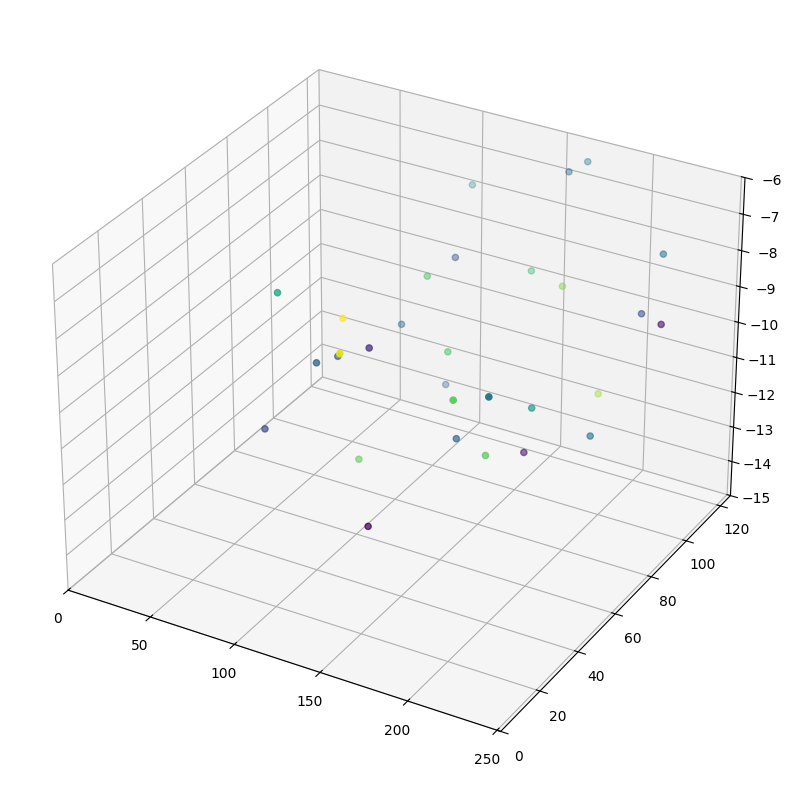

In [21]:
%matplotlib inline
df_scores_particles = pd.DataFrame(all_particles_prop)

# plot in 3D starting points of the particles and color them according to the score
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111, projection='3d')


ax.scatter(particles_loc_x, particles_loc_y, particles_loc_z, c=df_scores_particles.loc["new_resolution factor 4"], cmap="viridis")

plt.xlim(0, T1.get_xg()[-1])
plt.ylim(0, T1.get_yg()[-1])
ax.set_zlim(-15, -6)

In [22]:
print(np.corrcoef(df_scores_particles.loc["layers"], df_scores_particles.loc["new_resolution factor 2"]))
print(np.corrcoef(df_scores_particles.loc["layers"], df_scores_particles.loc["new_resolution factor 4"]))
print(np.corrcoef(df_scores_particles.loc["new_resolution factor 2"], df_scores_particles.loc["new_resolution factor 4"]))

[[1.         0.34891548]
 [0.34891548 1.        ]]
[[1.         0.44246467]
 [0.44246467 1.        ]]
[[1.         0.32416969]
 [0.32416969 1.        ]]


In [23]:
%matplotlib tk

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection="3d")

for df in l_df_pi[0]:
    ax.plot(df["x"], df["y"], df["z"])
    
plt.xlim(0, T1.get_xg()[-1])
plt.ylim(0, T1.get_yg()[-1])
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [24]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = 2
for df in [l_df_pi[0][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[1][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="r")
    # ax.scatter(df["x"], df["y"], df["z"], c=df["time"], cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[2][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="b")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi[3][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="g")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

20.984696363704085
141.1970896114428
18.461846015288494
18.759567874229745


In [25]:
%matplotlib inline

In [26]:
from scipy.spatial import distance

def DTW(path1, path2):
    """
    Compute the Frechet distance between two pathlines
    """
    
    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = dist[i, j]
            elif j == 0:
                MF[i, j] = dist[i, j]
            else:
                MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

    return MF[-1, -1]

def frechet_distance(path1, path2):

    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = max(MF[i, j-1], dist[i, j])
            elif j == 0:
                MF[i, j] = max(MF[i-1, j], dist[i, j])
            else:
                MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
    return MF[-1, -1]

def hausdorff_distance(path1, path2):
    """
    Compute the Hausdorff distance between two pathlines
    """
    
    from scipy.spatial.distance import directed_hausdorff

    d1 = directed_hausdorff(path1, path2)
    return d1[0]

In [27]:
%matplotlib inline

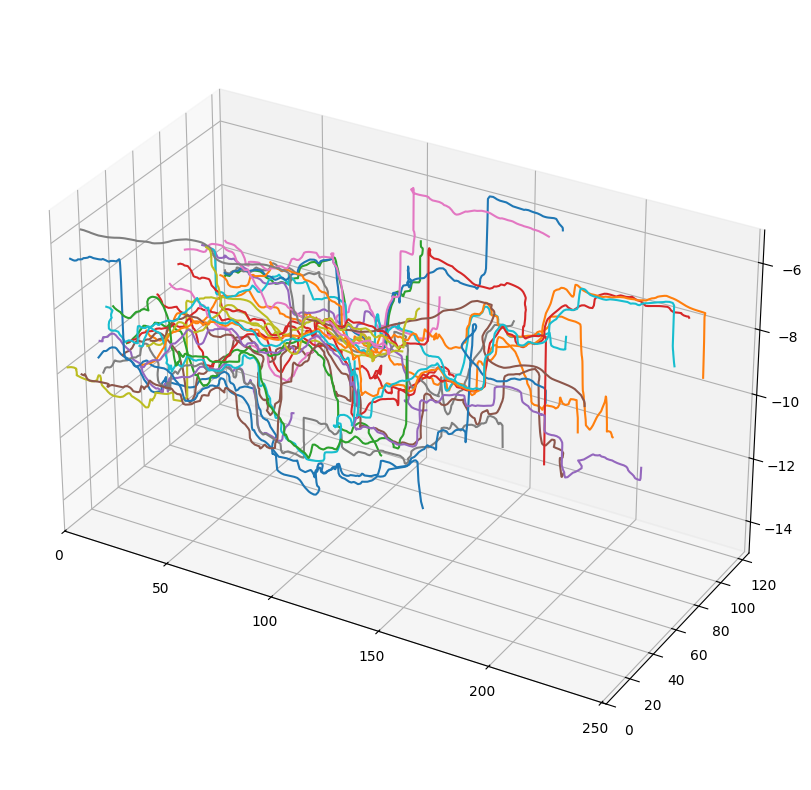

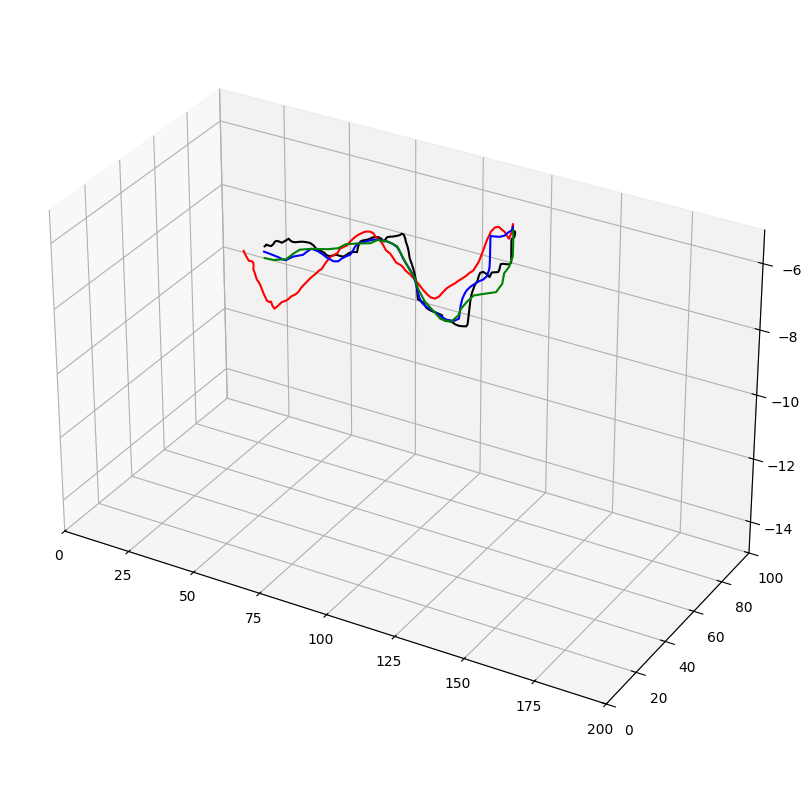

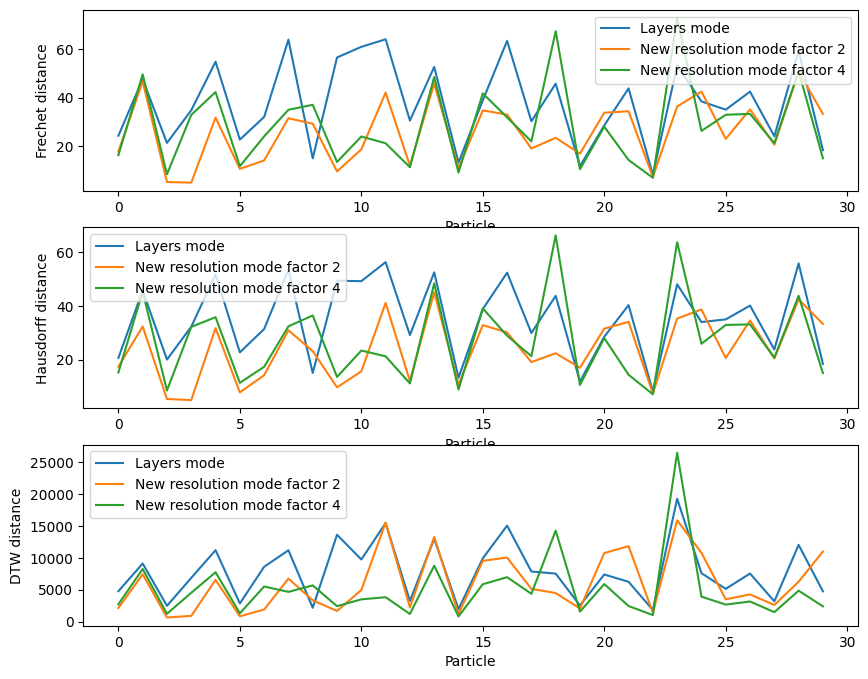

Frechet distance
Layers mode:  37.841973559280106
New resolution mode factor 2:  25.87131523161887
New resolution mode factor 4:  28.688096748768277
Hausdorff distance
Layers mode:  35.10141001721381
New resolution mode factor 2:  24.08487469405036
New resolution mode factor 4:  27.09185146609752
DTW distance
Layers mode:  7801.0525060672835
New resolution mode factor 2:  5958.453756668235
New resolution mode factor 4:  4978.528162431847


In [28]:
# write a function to compute the frechet distance between two pathlines
l_layer_frechet = []
l_new_res_frechet = []
l_new_res_2_frechet = []
l_layer_hausdorff = []
l_new_res_hausdorff = []
l_new_res_2_hausdorff = []
l_layer_dtw = []
l_new_res_dtw = []
l_new_res_2_dtw = []
for i_particle in range(n_loc):
    if i_particle in []:
        pass
    else:
        # compute frechet and hausdorffdistance
        path1 = l_df_pi[0][i_particle][["x", "y", "z"]].values
        path2 = l_df_pi[1][i_particle][["x", "y", "z"]].values
        l_layer_frechet.append(frechet_distance(path1, path2))
        l_layer_hausdorff.append(hausdorff_distance(path1, path2))

        path2 = l_df_pi[2][i_particle][["x", "y", "z"]].values
        l_new_res_frechet.append(frechet_distance(path1, path2))
        l_new_res_hausdorff.append(hausdorff_distance(path1, path2))
        
        path2 = l_df_pi[3][i_particle][["x", "y", "z"]].values
        l_new_res_2_frechet.append(frechet_distance(path1, path2))
        l_new_res_2_hausdorff.append(hausdorff_distance(path1, path2))

        # # DTW
        path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

        path2 = l_df_pi[1][i_particle][["x", "y", "z", "time"]]

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")

        l_layer_dtw.append(DTW(path1.values, path2.values))

        path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

        path2 = l_df_pi[2][i_particle][["x", "y", "z", "time"]]

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
        l_new_res_dtw.append(DTW(path1.values, path2.values))

        path1 = l_df_pi[0][i_particle][["x", "y", "z", "time"]]

        path2 = l_df_pi[3][i_particle][["x", "y", "z", "time"]]

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
        l_new_res_2_dtw.append(DTW(path1.values, path2.values))

fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(l_layer_frechet, label="Layers mode")
ax[0].plot(l_new_res_frechet, label="New resolution mode factor 2")
ax[0].plot(l_new_res_2_frechet, label="New resolution mode factor 4")
ax[0].set_xlabel("Particle")
ax[0].set_ylabel("Frechet distance")
ax[0].legend()

ax[1].plot(l_layer_hausdorff, label="Layers mode")
ax[1].plot(l_new_res_hausdorff, label="New resolution mode factor 2")
ax[1].plot(l_new_res_2_hausdorff, label="New resolution mode factor 4")
ax[1].set_xlabel("Particle")
ax[1].set_ylabel("Hausdorff distance")
ax[1].legend()

ax[2].plot(l_layer_dtw, label="Layers mode")
ax[2].plot(l_new_res_dtw, label="New resolution mode factor 2")
ax[2].plot(l_new_res_2_dtw, label="New resolution mode factor 4")
ax[2].set_xlabel("Particle")
ax[2].set_ylabel("DTW distance")
ax[2].legend()

plt.show()

print("Frechet distance")
print("Layers mode: ", np.mean(l_layer_frechet))
print("New resolution mode factor 2: ", np.mean(l_new_res_frechet))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_frechet))
print("Hausdorff distance")
print("Layers mode: ", np.mean(l_layer_hausdorff))
print("New resolution mode factor 2: ", np.mean(l_new_res_hausdorff))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_hausdorff))
print("DTW distance")
print("Layers mode: ", np.mean(l_layer_dtw))
print("New resolution mode factor 2: ", np.mean(l_new_res_dtw))
print("New resolution mode factor 4: ", np.mean(l_new_res_2_dtw))

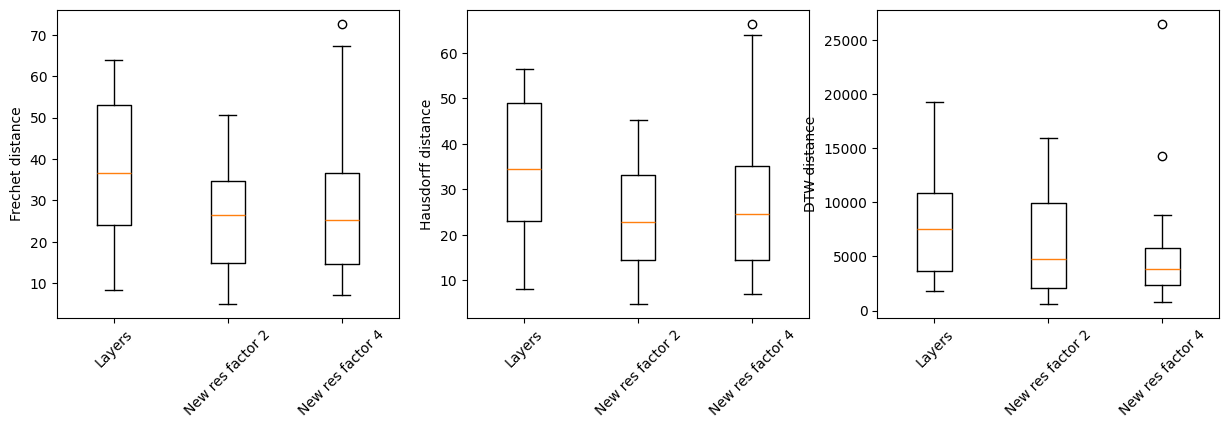

In [29]:

# plot boxplots of the frechet, hausdorff and DTW distances
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].boxplot([l_layer_frechet, l_new_res_frechet, l_new_res_2_frechet])
ax[0].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[0].set_ylabel("Frechet distance")

ax[1].boxplot([l_layer_hausdorff, l_new_res_hausdorff, l_new_res_2_hausdorff])
ax[1].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[1].set_ylabel("Hausdorff distance")

ax[2].boxplot([l_layer_dtw, l_new_res_dtw, l_new_res_2_dtw])
ax[2].set_xticklabels(["Layers", "New res factor 2", "New res factor 4"], rotation=45)
ax[2].set_ylabel("DTW distance")

plt.show()

In [30]:
idx_min = np.argmin(l_new_res_dtw)

In [31]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = 0
for df in [l_df_pi[0][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")
# for df in [l_df_pi[1][i_particle]]:
#     ax.plot(df["x"], df["y"], df["z"], color="r")
# for df in [l_df_pi[2][i_particle]]:
#     ax.plot(df["x"], df["y"], df["z"], color="b")
for df in [l_df_pi[3][i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="g")
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [34]:
%matplotlib inline

In [32]:

sum(np.array(l_new_res_frechet) < np.array(l_layer_frechet)) / len(l_new_res_frechet)

0.8333333333333334

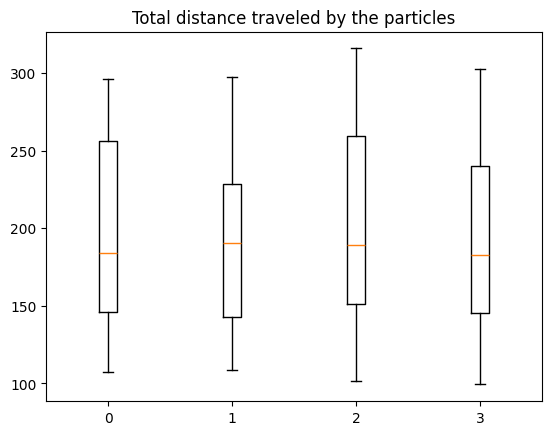

Total time traveled by the particles
archpy:  1949.8977112944376
Layers mode:  15777.504087100795
New resolution mode factor 2:  1049.4118307788626
New resolution mode factor 4:  2048.985438188439


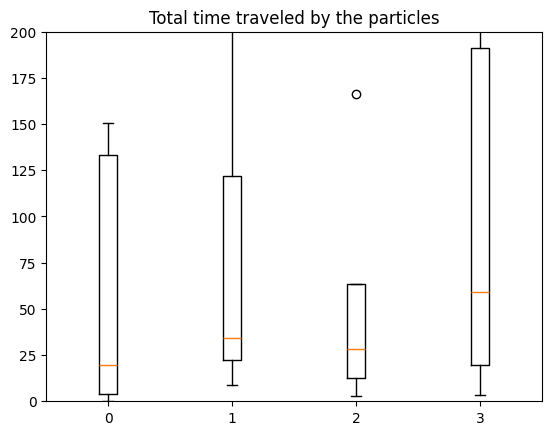

In [ ]:
plt.title("Total distance traveled by the particles")

plt.boxplot([l_df_pi[0][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[0])
plt.boxplot([l_df_pi[1][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[1])
plt.boxplot([l_df_pi[2][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[2])
plt.boxplot([l_df_pi[3][i].cum_distance.iloc[-1] for i in range(n_loc)], positions=[3])

plt.show()

plt.title("Total time traveled by the particles")

plt.boxplot([l_df_pi[0][i].time.iloc[-1] for i in range(n_loc)], positions=[0])
plt.boxplot([l_df_pi[1][i].time.iloc[-1] for i in range(n_loc)], positions=[1])
plt.boxplot([l_df_pi[2][i].time.iloc[-1] for i in range(n_loc)], positions=[2])
plt.boxplot([l_df_pi[3][i].time.iloc[-1] for i in range(n_loc)], positions=[3])

print("Mean time traveled by the particles")
print("archpy: ", np.mean([l_df_pi[0][i].time.iloc[-1] for i in range(n_loc)]))
print("Layers mode: ", np.mean([l_df_pi[1][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 2: ", np.mean([l_df_pi[2][i].time.iloc[-1] for i in range(n_loc)]))
print("New resolution mode factor 4: ", np.mean([l_df_pi[3][i].time.iloc[-1] for i in range(n_loc)]))

plt.ylim(0, 200)
# set y axis to log scale
# plt.yscale("log")
plt.show()

In [44]:
((np.array((162.693672,	12.395405,	-11.424975)) - np.array((161.620415,	12.489053,	-11.311980)))**2).sum()**.5

1.0832443888513643